In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table('C:/Users/devro/Desktop/Jupyter/fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruit_name_with_labels = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
fruit_name_with_labels

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [5]:
X = fruits[['height','width','mass']]
y = fruits[['fruit_label']]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [8]:
knn.fit(X_train,y_train)

C:\Users\devro\Anaconda3\NM\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
knn.score(X_test,y_test)

0.5333333333333333

In [10]:
fruit_pred = knn.predict([[4.4,3.3,20]])
fruit_name_with_labels[fruit_pred[0]]

'mandarin'

In [11]:
fruit_pred = knn.predict([[5,5,100]])
fruit_name_with_labels[fruit_pred[0]]

'lemon'

C:\Users\devro\Anaconda3\NM\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\devro\Anaconda3\NM\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\devro\Anaconda3\NM\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\devro\Anaconda3\NM\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\devro\Anaconda3\NM\lib\site-pac

<IPython.core.display.Javascript object>


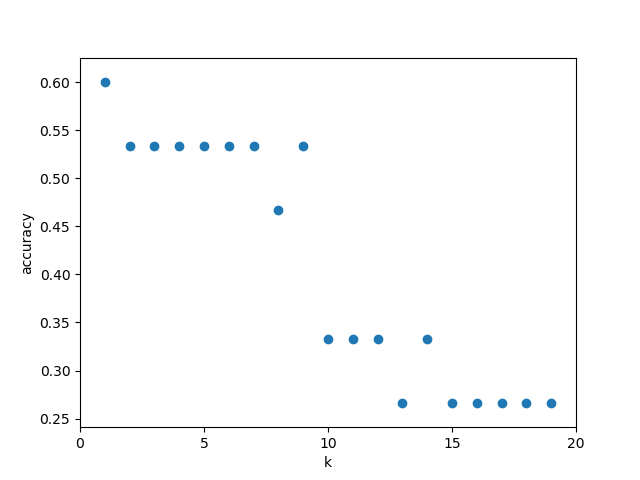

In [12]:
k_range = range(1,20)
result = []

for k in k_range:
    #X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    result.append(knn.score(X_test,y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,result)
plt.xticks([0,5,10,15,20]);